## The Battle of Neighbourhoods
### We plan to compare and cluster hotels in the city of Hyderabad based on the cuisines available in their proximity
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Part 1 - Aquiring the Hotel Data
### Foursquare allows us only 50 venues per quiery. Hence, we'll get past this by searching for Hotels around 10 key locations in hyderabad. This should provide us with upto 500 Hotels and eventually upto 500 feature sets for clustering.

The ten locations are listed below

In [2]:
Hyd_Areas = ['Kachiguda','Kukatpally','Gachibowli','Jubilee Hills','Secunderabad','Dilsukhnagar','ABIDS, Hyderabad','ECIL, Hyderabad','Mehdipatnam','Ameerpet']

we shall start by getting the geo locations for the above neighbourhoods

In [3]:
import pandas as pd
import numpy as np
import requests
import matplotlib as plt
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [4]:
area_loc = 0
area_found = np.zeros(10,dtype = float)
geolocator = Nominatim(user_agent="Hyd_explorer")
area_lat = np.zeros(10,dtype = float)
area_lon = np.zeros(10,dtype = float)
for area in Hyd_Areas:
    while area_found[area_loc] == 0:
        location = geolocator.geocode(area)
        area_lat[area_loc] = location.latitude
        area_lon[area_loc] = location.longitude
        if np.isnan(area_lat[area_loc]) == 0:
            area_found[area_loc] = 1
    area_loc = area_loc+1

In [5]:
Hyd_Areas_df = pd.DataFrame(data = {'Area':Hyd_Areas,'Latitude':area_lat,'Longitude':area_lon})
Hyd_Areas_df

,Area,Latitude,Longitude
0,Kachiguda,17.390040,78.494621
1,Kukatpally,17.493084,78.405441
2,Gachibowli,17.443622,78.351964
3,Jubilee Hills,17.430836,78.410288
4,Secunderabad,17.469089,78.505918
5,Dilsukhnagar,17.368795,78.525030
6,"ABIDS, Hyderabad",17.389478,78.477182
7,"ECIL, Hyderabad",17.475853,78.567722
8,Mehdipatnam,17.394263,78.434251
9,Ameerpet,17.437501,78.448251


### Now we use Foursquare API to obtain the Hotel data within 5 kms around these locations in Hyderabad

In [6]:
CLIENT_ID = '1ATIMOM43KUB35ZQNGIKVZTN3XWDKDWTHUONBTQFICYEHTXH' # your Foursquare ID
CLIENT_SECRET = 'PTVPVPUPIN4D0CXTIIZAOWV0UO1B33GCDRXZSSGOLB1A50FW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 5000
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1ATIMOM43KUB35ZQNGIKVZTN3XWDKDWTHUONBTQFICYEHTXH
CLIENT_SECRET:PTVPVPUPIN4D0CXTIIZAOWV0UO1B33GCDRXZSSGOLB1A50FW


In [22]:
area_loc = 0
while area_loc<10:
    search_query = 'Hotel'
    latitude = Hyd_Areas_df.loc[area_loc,'Latitude']
    longitude = Hyd_Areas_df.loc[area_loc,'Longitude']
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    json_df = json_normalize(venues)
    print(json_df.shape[0],' Hotels found in ', Hyd_Areas_df.loc[area_loc,'Area'])
    if area_loc>0:
        Hotel_df = Hotel_df.append(json_df)
    else:
        Hotel_df = json_df
    area_loc = area_loc+1

50  Hotels found in  Kachiguda
50  Hotels found in  Kukatpally
50  Hotels found in  Gachibowli
50  Hotels found in  Jubilee Hills
50  Hotels found in  Secunderabad
50  Hotels found in  Dilsukhnagar
50  Hotels found in  ABIDS, Hyderabad
12  Hotels found in  ECIL, Hyderabad
50  Hotels found in  Mehdipatnam
50  Hotels found in  Ameerpet


In [28]:
print(Hotel_df.shape)
Hotel_df.head()

(462, 18)


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4e162ff36284b506cfd78f49,Chaderghat,IN,Hyderabad,India,NaN,1468,"[Chaderghat, Hyderabad 500036, Telangana, India]","[{'label': 'display', 'lat': 17.37710064393863...",17.377101,78.491940,NaN,500036,Telangana,Hotel Savera,v-1580486825
1,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,52595783498e205d3d0e7f7d,NaN,IN,NaN,India,NaN,77,[India],"[{'label': 'display', 'lat': 17.38948727727054...",17.389487,78.495061,NaN,NaN,NaN,Hotel Vaishnaoi,v-1580486825
2,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,51250584e4b080a189b1ae44,NaN,IN,NaN,India,NaN,1282,[India],"[{'label': 'display', 'lat': 17.37855036524693...",17.378550,78.493727,NaN,NaN,NaN,Hotel Firdous,v-1580486825
3,"[{'id': '4bf58dd8d48988d1fb931735', 'name': 'M...",False,4cfe465fd8468cfa8f09056c,Near Kachiguda Railway Station,IN,Hyderabad,India,NaN,177,"[Near Kachiguda Railway Station, Hyderabad, Te...","[{'label': 'display', 'lat': 17.38968757991075...",17.389688,78.496246,NaN,NaN,Telangana,Hotel Tourist Plaza,v-1580486825
4,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4be06fbf4c55b651426feab7,"4-1-999, Abidi Road Chirag Ali Road",IN,Hyderabad,India,NaN,1892,"[4-1-999, Abidi Road Chirag Ali Road, Hyderaba...","[{'label': 'display', 'lat': 17.39194189711636...",17.391942,78.476915,NaN,NaN,Telangana,Taj Mahal Hotel,v-1580486825


### Before we proceed, Let's save the DataFrame so we won't have to go to Foursquare again for this Data.. (Essential, cause Foursquare allows limited number of calls)

In [4]:
from project_lib import Project
project = Project('',"6b3a1f01-5650-449d-a047-d5bfd2419524","p-7fc347dc4de3c0bb94ff2f70b9b137efe46e1bdc")
project.save_data(file_name = "mypanda.csv",data = Hotel_df.to_csv(index=False))

### Let's load the saved CSV

In [7]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
#@hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b5f3707efeb24ff097ca1392fea7ba26 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='hQjZXGgUXe4_fAWVbsd2yzZeH1aFZq8T0D6TeSsmFAe8',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_b5f3707efeb24ff097ca1392fea7ba26.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-izwcgsbp5ofgcs',Key='mypanda.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Hotel_df = pd.read_csv(body)
Hotel_df.head()


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4e162ff36284b506cfd78f49,Chaderghat,IN,Hyderabad,India,NaN,1468,"['Chaderghat', 'Hyderabad 500036', 'Telangana'...","[{'label': 'display', 'lat': 17.37710064393863...",17.377101,78.491940,NaN,500036,Telangana,Hotel Savera,v-1580486825
1,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,52595783498e205d3d0e7f7d,NaN,IN,NaN,India,NaN,77,['India'],"[{'label': 'display', 'lat': 17.38948727727054...",17.389487,78.495061,NaN,NaN,NaN,Hotel Vaishnaoi,v-1580486825
2,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,51250584e4b080a189b1ae44,NaN,IN,NaN,India,NaN,1282,['India'],"[{'label': 'display', 'lat': 17.37855036524693...",17.378550,78.493727,NaN,NaN,NaN,Hotel Firdous,v-1580486825
3,"[{'id': '4bf58dd8d48988d1fb931735', 'name': 'M...",False,4cfe465fd8468cfa8f09056c,Near Kachiguda Railway Station,IN,Hyderabad,India,NaN,177,"['Near Kachiguda Railway Station', 'Hyderabad'...","[{'label': 'display', 'lat': 17.38968757991075...",17.389688,78.496246,NaN,NaN,Telangana,Hotel Tourist Plaza,v-1580486825
4,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4be06fbf4c55b651426feab7,"4-1-999, Abidi Road Chirag Ali Road",IN,Hyderabad,India,NaN,1892,"['4-1-999, Abidi Road Chirag Ali Road', 'Hyder...","[{'label': 'display', 'lat': 17.39194189711636...",17.391942,78.476915,NaN,NaN,Telangana,Taj Mahal Hotel,v-1580486825


### Let's clean up the Dataframe

In [8]:
Hotel_DF = pd.DataFrame(data = {"Hotel":Hotel_df["name"],"Latitude":Hotel_df["location.lat"],"Longitude":Hotel_df["location.lng"]})

In [9]:
Hotel_DF.drop_duplicates(inplace = True)
Hotel_DF.reset_index(drop = True, inplace=True)

print(Hotel_DF.shape)
Hotel_DF.tail(10)

(312, 3)


,Hotel,Latitude,Longitude
302,Marigold Hotel,17.434551,78.455743
303,shri sai prem hotel,17.439396,78.442368
304,Green Park Hotel Bus Stop,17.435538,78.454333
305,hotel innova,17.426220,78.452062
306,Hotel Haritha Plaza,17.427271,78.452347
307,Hotel Al-Shafa,17.426390,78.452000
308,Greenfields college of Hotel Management,17.430528,78.449281
309,Hotel Akson,17.424333,78.453822
310,Hotel Bashar,17.426177,78.451324
311,Hotel Inner Circle Hyderabad,17.424039,78.456990


### We ended up with 312 Hotels to work with. That's pretty good! Let's visualize them on the map using Folium

In [10]:
location = geolocator.geocode('Hyderabad, India')
hyd_lat = location.latitude
hyd_lon = location.longitude
map_hyderabad = folium.Map(location=[hyd_lat+0.05, hyd_lon], zoom_start=12)

# add markers to map
for lat, lng, hotel in zip(Hotel_DF['Latitude'], Hotel_DF['Longitude'], Hotel_DF['Hotel']):
    label = hotel
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hyderabad)  
    
map_hyderabad

### We shall now, using Foursquare API, Obtain the number of places that serve the following listed Cuisines within 1.5 kms of the hotel

In [11]:
Cuisines = ["South Indian","North Indian","Cafe","Fast food","Biryani","Pizza","Burger","Chinese food","Bakery","Continental food"]

### The following code is used to get the data from foursquare and save it into the IBM database. This is done to avoid using foursquare eveytime we run the project.

In [ ]:
hotel_loc = 0
Cuisine_count = np.zeros([Hotel_DF.shape[0],10],dtype = int)
while hotel_loc<Hotel_DF.shape[0]:
    cuisine_loc = 0
    while cuisine_loc<10:
        search_query = Cuisines[cuisine_loc]
        latitude = Hotel_DF.loc[hotel_loc,'Latitude']
        longitude = Hotel_DF.loc[hotel_loc,'Longitude']
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, 1500, LIMIT)
        results = requests.get(url).json()
        venues = results['response']['venues']
        json_df = json_normalize(venues)
        project.save_data(file_name = 'Cuisines_{}_{}.csv'.format(hotel_loc,cuisine_loc),data = json_df.to_csv(index=False),overwrite = True)
        #print('Entry {}_{} '.format(hotel_loc,cuisine_loc),json_df.shape[0],' ', Cuisines[cuisine_loc],' Cuisines found around ', Hotel_DF.loc[hotel_loc,'Hotel'])
        cuisine_loc = cuisine_loc+1
    hotel_loc = hotel_loc+1

### The following code is used to load the data from IBM database. 

In [12]:
hotel_loc = 0
Cuisine_count = np.zeros([Hotel_DF.shape[0],10],dtype = int)
while hotel_loc<Hotel_DF.shape[0]:
    cuisine_loc = 0
    while cuisine_loc<10:
        try:
            body = client_b5f3707efeb24ff097ca1392fea7ba26.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-izwcgsbp5ofgcs',Key='Cuisines_{}_{}.csv'.format(hotel_loc,cuisine_loc))['Body']
            # add missing __iter__ method, so pandas accepts body as file-like object
            if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
            json_df = pd.read_csv(body)
            Cuisine_count[hotel_loc,cuisine_loc] = json_df.shape[0]
        except:
            Cuisine_count[hotel_loc,cuisine_loc] = 0
        cuisine_loc = cuisine_loc+1
    hotel_loc = hotel_loc+1

In [13]:
Feature_Set = pd.DataFrame(data = Cuisine_count)
Feature_Set.columns = Cuisines

### Let's use StandardScaler to normalise the data to avoid biases

In [14]:
from sklearn.preprocessing import StandardScaler
X = Cuisine_count
Clus_dataSet = StandardScaler().fit_transform(X)
Scaled_Feature_Set = pd.DataFrame(data = Clus_dataSet)
Scaled_Feature_Set.columns = Cuisines
Scaled_Feature_Set.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,South Indian,North Indian,Cafe,Fast food,Biryani,Pizza,Burger,Chinese food,Bakery,Continental food
0,-0.250945,-0.361362,-0.686165,-0.852959,-0.631766,-0.654277,-0.528844,-0.913631,-0.341934,-0.711788
1,-0.707475,-0.643224,-0.142653,-0.548992,0.613145,-0.426449,-0.034834,-0.690875,0.270017,-0.552020
2,-0.250945,-0.361362,-0.686165,-1.004943,-0.631766,-0.654277,-0.528844,-1.062134,-0.545918,-0.871557
3,-0.707475,-0.643224,-0.142653,-0.624984,-0.216795,-0.426449,-1.022854,-0.690875,0.270017,-0.552020
4,0.205585,0.766087,0.461250,-0.548992,0.198175,0.257038,-0.034834,-0.690875,1.697904,-0.631904
5,-0.022680,0.202363,0.098908,-0.473000,0.613145,0.029209,-0.034834,-0.690875,0.881969,-0.552020
6,-0.022680,-0.079500,-0.263433,-0.624984,-0.631766,-0.654277,-1.022854,-0.765127,1.493920,-0.552020
7,-0.707475,-0.643224,-0.142653,-0.624984,-0.216795,-0.654277,-1.022854,-0.690875,0.270017,-0.552020
8,-0.250945,-0.079500,0.159299,-0.548992,0.613145,0.029209,-0.034834,-0.690875,0.881969,-0.552020
9,0.205585,0.202363,0.159299,-0.245025,0.613145,0.029209,-0.034834,-0.468120,1.493920,-0.312368


### Let's use Kmeans algorithm to cluster the Hotels into 5 categories. 

In [15]:
from sklearn.cluster import KMeans 

In [22]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 10)
k_means.fit(X)
labels = k_means.labels_

In [23]:
Scaled_Feature_Set['Label'] = labels
Scaled_Feature_Set.head(10)

,South Indian,North Indian,Cafe,Fast food,Biryani,Pizza,Burger,Chinese food,Bakery,Continental food,Label
0,-0.250945,-0.361362,-0.686165,-0.852959,-0.631766,-0.654277,-0.528844,-0.913631,-0.341934,-0.711788,1
1,-0.707475,-0.643224,-0.142653,-0.548992,0.613145,-0.426449,-0.034834,-0.690875,0.270017,-0.552020,1
2,-0.250945,-0.361362,-0.686165,-1.004943,-0.631766,-0.654277,-0.528844,-1.062134,-0.545918,-0.871557,3
3,-0.707475,-0.643224,-0.142653,-0.624984,-0.216795,-0.426449,-1.022854,-0.690875,0.270017,-0.552020,1
4,0.205585,0.766087,0.461250,-0.548992,0.198175,0.257038,-0.034834,-0.690875,1.697904,-0.631904,2
5,-0.022680,0.202363,0.098908,-0.473000,0.613145,0.029209,-0.034834,-0.690875,0.881969,-0.552020,1
6,-0.022680,-0.079500,-0.263433,-0.624984,-0.631766,-0.654277,-1.022854,-0.765127,1.493920,-0.552020,1
7,-0.707475,-0.643224,-0.142653,-0.624984,-0.216795,-0.654277,-1.022854,-0.690875,0.270017,-0.552020,1
8,-0.250945,-0.079500,0.159299,-0.548992,0.613145,0.029209,-0.034834,-0.690875,0.881969,-0.552020,2
9,0.205585,0.202363,0.159299,-0.245025,0.613145,0.029209,-0.034834,-0.468120,1.493920,-0.312368,2


### Let's visualize the clustered hotels on the map

In [27]:
# create map
location = geolocator.geocode('Hyderabad, India')
hyd_lat = location.latitude
hyd_lon = location.longitude
map_hyderabad = folium.Map(location=[hyd_lat+0.05, hyd_lon], zoom_start=12)


# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, hotel, cluster in zip(Hotel_DF['Latitude'], Hotel_DF['Longitude'], Hotel_DF['Hotel'], Scaled_Feature_Set['Label']):
    label = "{}, Clus {}".format(hotel,cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_hyderabad)  
    
map_hyderabad

### Now that we have clustered the Hotels and visualized them, Let us run some basic analysis on the clusters

In [35]:
Labelled_Set = pd.DataFrame(data = Cuisine_count)
Labelled_Set.columns = Cuisines
Labelled_Set['Label']= labels

### Let's see how many Hotels fall under each cluster

In [30]:
Grouped_Set = Scaled_Feature_Set.groupby('Label')
for loc in range(0,5):
    print('Size of cluster ', loc, ' is ', np.size(Grouped_Set.groups[loc]))

Size of cluster  0  is  58
Size of cluster  1  is  82
Size of cluster  2  is  69
Size of cluster  3  is  75
Size of cluster  4  is  28


### Let's see some plots summarising the clusters

In [31]:
Mean_Set = Grouped_Set.mean()
Mean_Set

,South Indian,North Indian,Cafe,Fast food,Biryani,Pizza,Burger,Chinese food,Bakery,Continental food
Label,,,,,,,,,,
0,0.847088,1.004212,1.279643,1.056007,0.427124,1.341188,1.515335,1.037400,-0.450960,1.019494
1,-0.000410,0.075181,-0.515305,-0.407202,-0.216795,-0.109711,-0.589089,-0.407451,0.279968,-0.407839
2,0.069949,0.071644,0.455999,-0.140398,-0.144627,-0.099564,0.051081,-0.054892,0.471045,-0.179227
3,-1.209658,-1.229498,-1.237730,-1.026220,-0.792221,-1.061332,-0.812076,-1.065104,-0.926688,-1.001502
4,1.314300,0.816420,1.050055,2.099865,2.228565,0.631328,0.635608,2.032576,1.435639,2.206836


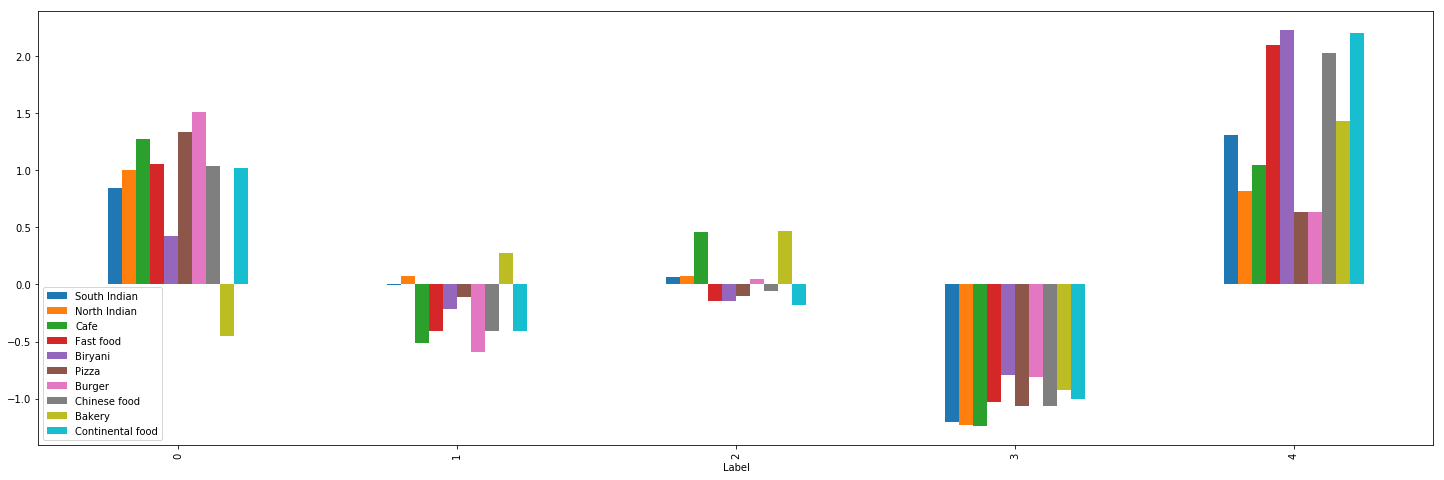

In [34]:
Mean_Set.plot(kind = 'bar',figsize = [25,8])

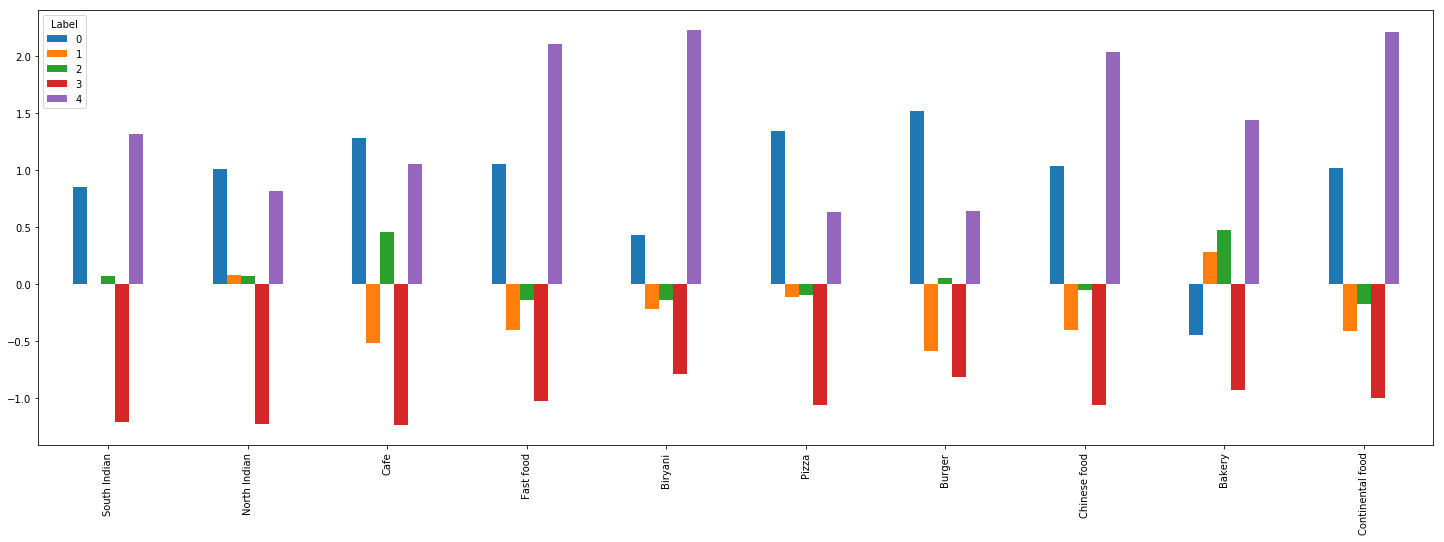

In [33]:
Mean_Set.transpose().plot(kind = 'bar',figsize = [25,8])